# Lab One Exploring the data
## Team member
Rongwei Ji, Jonathan Mejia, Xiaoqing Zou
## Data introduction 
Data source: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
Data file name:  Lab1/data/ObesityDataSetOriginal.csv

17 colums total, 2111 rows, `NObeyesdad` is the categorical target

## Environment
python 3.11.5, conda 23.9.0 ,numpy-1.26.3 pandas-2.2.0 pytz-2023.4 tzdata-2023.4, pip-23.3.2

## Something more
Kaggal generate new dataset form the original one by the Deep learning about 20758 rows: https://www.kaggle.com/competitions/playground-series-s4e2/data and can using it do more. 
data/train.csv



## 1.Business Understanding
### Overview of the data
The data was gathered through an online platform via a survey where respondents remained anonymous. Its objective is to gauge obesity levels among individuals from Mexico, Peru, and Colombia, spanning ages 14 to 65. This dataset will be utilized to train a model using the 'train.csv' file and subsequently applied for predictions using the 'test.csv' file. Due to the nature of its collection method, there may be inaccuracies present; nevertheless, it serves as valuable material for training and prediction model development.
#### Purpose of the data
The dataset comprises 17 attributes that concentrate on various aspects related to obesity. These attributes represent commonly recognized factors associated with obesity. The dataset was gathered to analyze several actions concerning the outcomes of obesity. By utilizing this dataset, we can construct models to predict the likelihood of obesity based on individuals' daily habits. Ultimately, this predictive capability can assist people in avoiding unhealthy behaviors. Alternatively, it can aid in the development of mechanical interventions or the creation of novel treatment methods.
#### Prediction for data
By prediction the data, we can identify the key factors that directly influence obesity. Moreover, we can analyze behavioral data to assess the likelihood of obesity.
#### Who may benefit from this report?
Every people who care about their health and daily habits should be interested on this model and report. Since it reveal the relationship between the obesity and daily behavior.
#### How well would your prediction algorithm need to perform useful to these third parties?
The model aims to identify the factors influencing obesity and determine their impact. It will provide precise estimations of how specific variables contribute to obesity. To ensure accuracy, the model will be evaluated using test datasets, as the data source encompasses an entire survey.
#### Attribute:
**Eatting habits related attributes:**
Frequent consumption of high caloric food (FAVC), 
Frequency of consumption of vegetables (FCVC), 
Number of main meals (NCP), 
Consumption of food between meals (CAEC), 
Consumption of water daily (CH20), and Consumption of alcohol (CALC). <br>
**The attributes related with the physical condition are:** 
Calories consumption monitoring (SCC),
Physical activity frequency (FAF),
Time using technology devices (TUE), 
Transportation used (MTRANS) <br>
**NObesity Value:**
•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

## 2.Data Understanding
### Importing
Do something review of the data.

In [202]:
# read the data Referencing code from lecture and in-class example
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('data/ObesityDataSet.csv') # read in the csv file
print(df.info())
df.head()
       

Pandas: 1.5.3
Numpy: 1.26.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2095 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Data type
Generaly, each type of the dataset should be numerical, each yes/no type will convert to binary encoding 1/0. In that case, it will suitable for the model alogrithm. In the analysis process, we can keep the non-numberic datatype for easily to read understand in data visualization.
In this dataset we check the non-numerical values to see the certain content and consider how to design the one-hot encoding. 
Let's review the valuse of the non-numerical columns

In [221]:
# we should comfirm the gender and other data type
non_numberic_list=['Gender','FAVC','family_history_with_overweight','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']

_ = [print(i,df[i].unique()) for i in non_numberic_list] # review the non-numberic

df.describe() #check the range

Gender ['Female' 'Male']
FAVC [0 1]
family_history_with_overweight [1 0]
CAEC [1 2 3 0]
SMOKE [0 1]
SCC [0 1]
CALC [0 1 2 3]
MTRANS ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC
count,2095.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.310366,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407
std,6.369785,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498
min,0.164768,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.926148,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000
50%,22.789402,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000
75%,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000


### Encoding
The numberical types are all the float which is based on the certain caculated method from the survery.
All the numberical types can be the continuous.
In the non-numberical type attributes, some can be ordinal/ranked, such as: CAEC, NObeyesdad, some are nominal,such as MTRANS.
<br>
In this dataset ,they are all assumed to be the indicators hypothesized to be related to obesity. Currently, we assume that there are no redundant or irrelevant indicators.
Also the string type is readable, we can convert them into numberic for next model algorithm.
<br>
At this time, we can do convert part of the data, 
<br>`CAEC` no, somethimes, frequnetly, always: convert to 0,1,2,3
<br>`CALC` no, somethimes, frequnetly, always: convert to 0,1,2,3
<br> yes/no ,convert to:0,1

In [204]:
df.replace(to_replace=['no','Sometimes','Frequently','Always','yes'],value=[0,1,2,3,1],inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2095 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II


In [234]:
df_describe=pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Attribute']=df.columns
df_describe['Description']=['Gender','Age','Weight','Height','family',
                            'Frequent consumption of high caloric food',
                            'Frequency of consumption of vegetables',
                            'Number of main meals',
                            'Consumption of food between meals',
                            'SMOKE',
                            'Consumption of water daily','Calories consumption monitoring',
                            "Physical activity frequency",
                          
                            "Time using technology devices",
                            "Consumption of alcohol",
                            "Transportation used","Obeyesdad"]
df_describe['Type']=['Bool,1/0','Interval,float','Ratio,float','Bool,1/0','Ratio,float','ratio,float','ratio,float','ratio,float','ratio,float',"Bool,1/0","Ordinal,int","Bool,1/0","ratio,float","Interval,float","Ordinal,int","norminal",""]
df_describe['Convertion']=['1=male,0=female',"Interver 14-65",'','yes=1.no=0','1-3','1-3','1-3','1-3','1-3','yes=1.no=0','discrete','yes=1.no=0','','','','','']
df_describe
# **Eatting habits related attributes:**
# Frequent consumption of high caloric food (FAVC), 
# Frequency of consumption of vegetables (FCVC), 
# Number of main meals (NCP), 
# Consumption of food between meals (CAEC), 
# Consumption of water daily (CH20), and Consumption of alcohol (CALC). <br>
# **The attributes related with the physical condition are:** 
# Calories consumption monitoring (SCC),
# Physical activity frequency (FAF),
# Time using technology devices (TUE), 
# Transportation used (MTRANS) <br>

,Attribute,Description,Type,Convertion
0,Gender,Gender,"Bool,1/0","1=male,0=female"
1,Age,Age,"Interval,float",Interver 14-65
2,Height,Weight,"Ratio,float",
3,Weight,Height,"Bool,1/0",yes=1.no=0
4,family_history_with_overweight,family,"Ratio,float",1-3
5,FAVC,Frequent consumption of high caloric food,"ratio,float",1-3
6,FCVC,Frequency of consumption of vegetables,"ratio,float",1-3
7,NCP,Number of main meals,"ratio,float",1-3
8,CAEC,Consumption of food between meals,"ratio,float",1-3
9,SMOKE,SMOKE,"Bool,1/0",yes=1.no=0


### Finding duplicate
There are multiple instances of duplication within the dataset. Due to the absence of a unique identification attribute, it's possible for two individuals to have identical values in this survey based on the limited data attributes. Consequently, it's not straightforward to remove these duplicate entries.

In [ ]:
# finding the duplicate
dup=df.duplicated()
print("There are {} duplicate instance".format(len(df[dup])))

There are 22 duplicate instance


### Finding missing

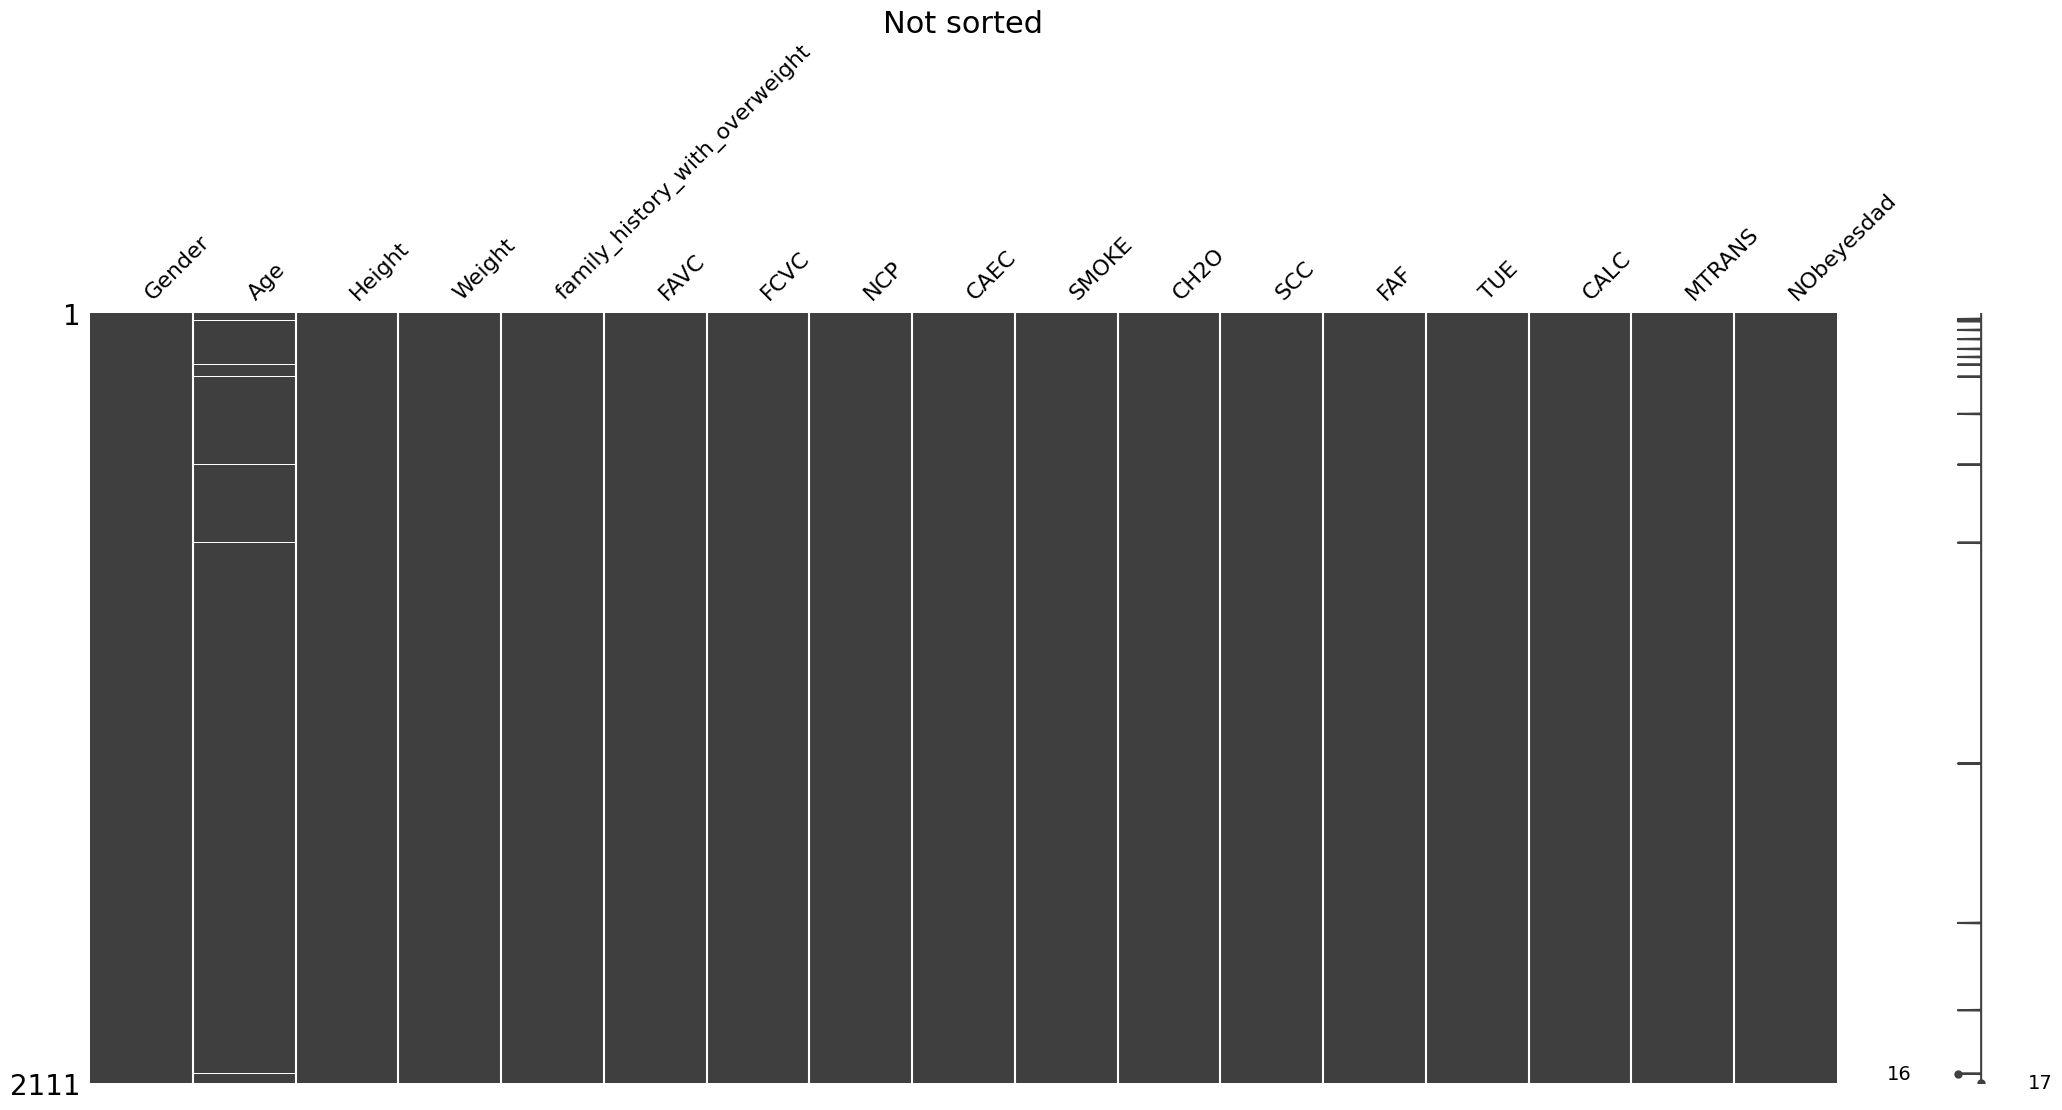

<Figure size 640x480 with 0 Axes>

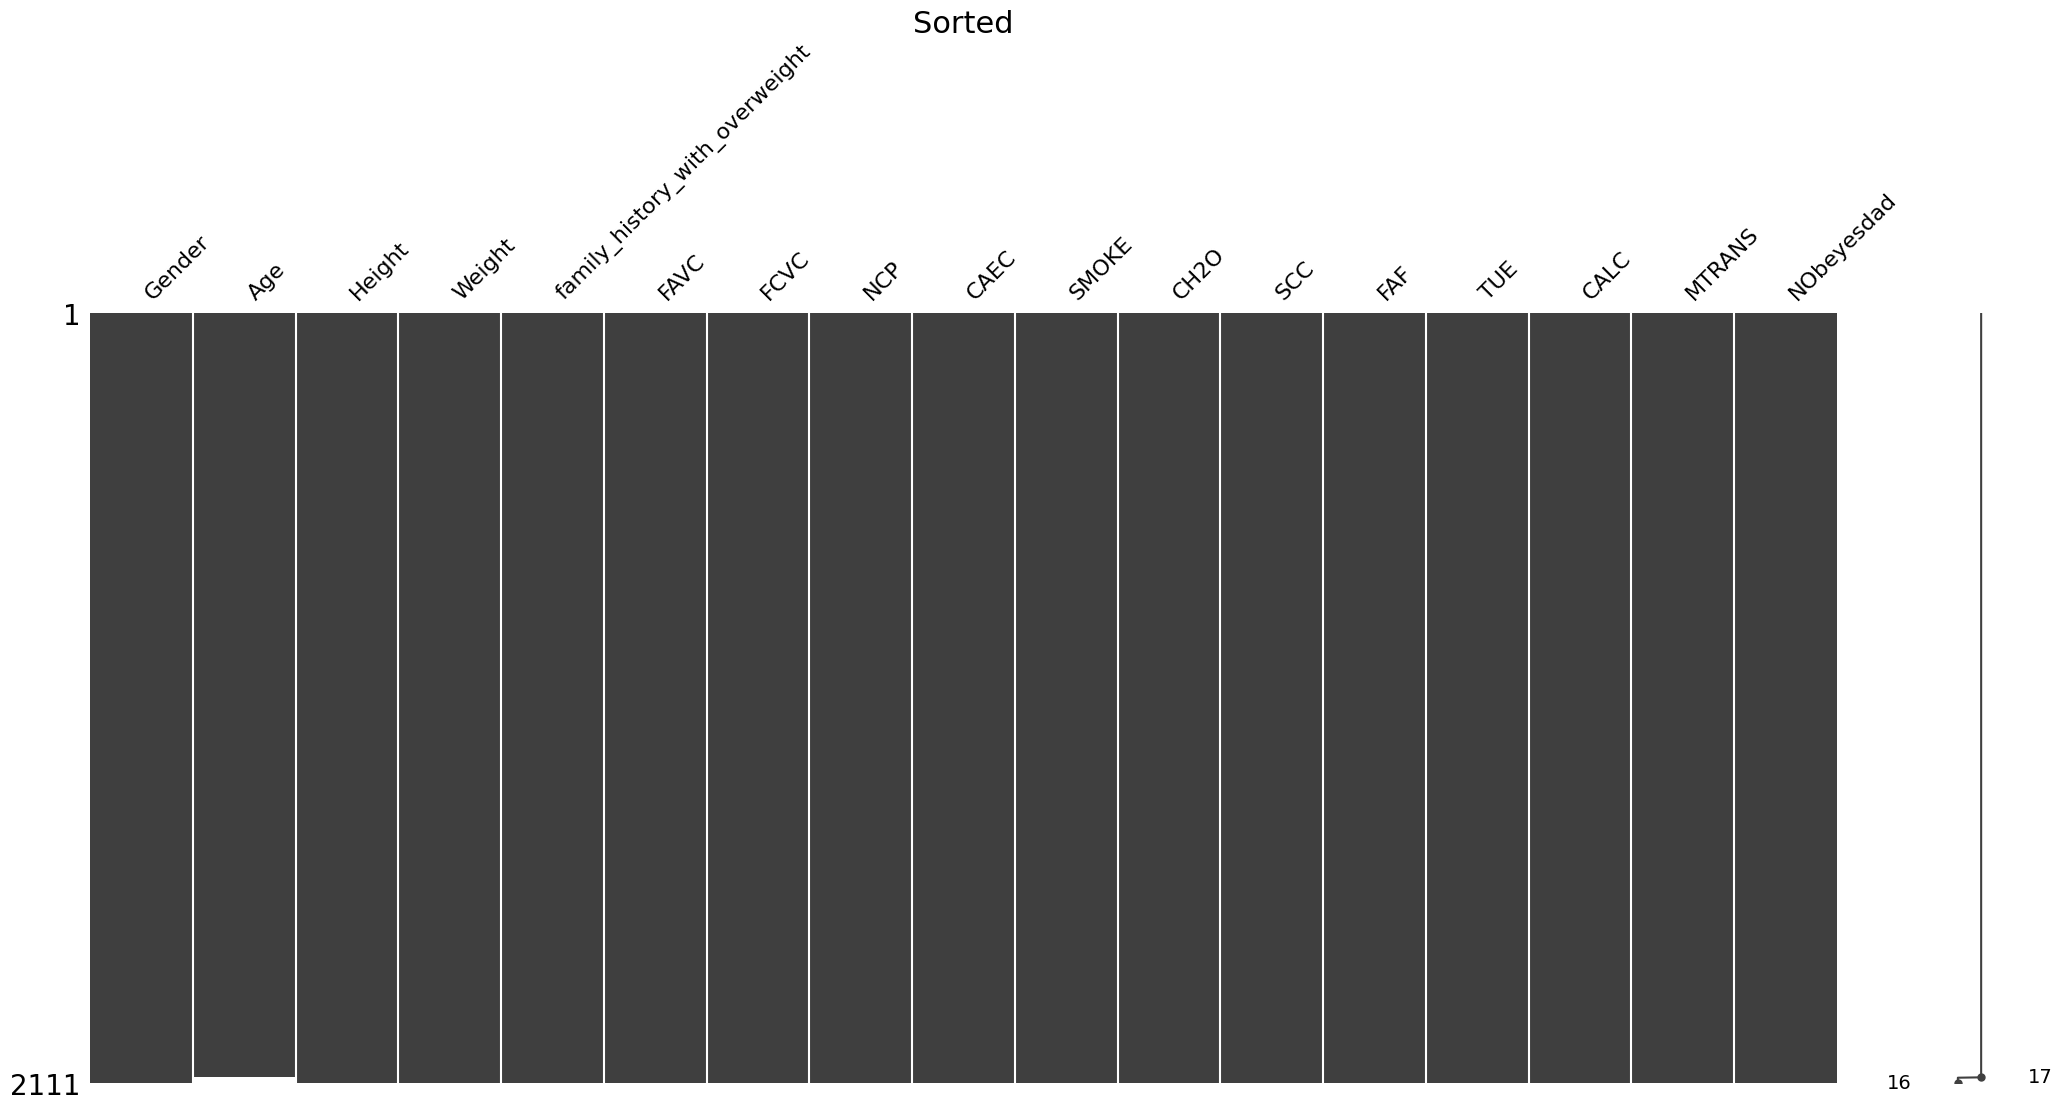

In [ ]:
# Referencing code from lecture and in-class example
import matplotlib
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline
import missingno as mn 

mn.matrix(df)
plt.title("Not sorted", fontsize=22)
plt.figure()
mn.matrix(df.sort_values(by=["Age"]))
plt.title("Sorted",fontsize=22)
plt.show()

The chart displayed indicates several missing age values, potentially due to customers omitting this information. Age is a crucial factor in understanding obesity. These omissions likely stem from errors in the survey process, suggesting a lack of strict guidelines.

### Imputation
To address this issue, we can utilize height as a proxy to categorize the data, as it may correlate closely with age.


In [ ]:


# Referencing code from lecture and in-class example
# do something group 
df_grouped = df.groupby(by=['Height','NObeyesdad'])
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median))
print('------------')

# the above process can remove columns, so let's find that and fix it

names_removed = list(set(df.columns) - set(df_imputed.columns)) # use list like a set operator
print(names_removed)
print('------------')

df_imputed[names_removed] = df[names_removed]
print(df_imputed.info())
df_imputed.head()


------------
['NObeyesdad', 'Height']
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   object 
 2   Weight                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   int64  
 4   FAVC                            2111 non-null   int64  
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   int64  
 8   SMOKE                           2111 non-null   int64  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int64  
 11  FAF                             2111 non-nul

,Gender,Age,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Height
0,Female,21.0,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight,1.62
1,Female,21.0,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight,1.52
2,Male,23.0,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight,1.80
3,Male,27.0,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I,1.80
4,Male,22.0,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II,1.78


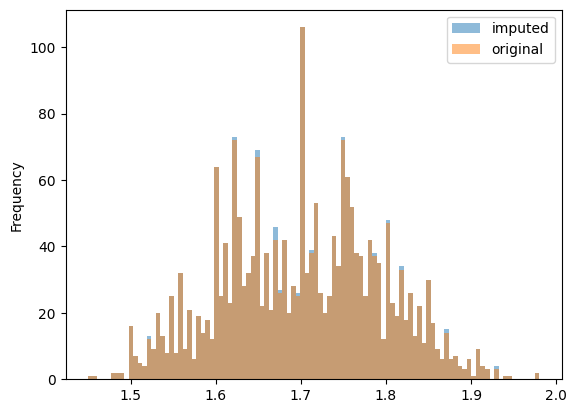

In [ ]:

# compared the distribution between the original and imputed
df_imputed.Height.plot(kind='hist', alpha=0.5, label="imputed",bins=100)
df.Height.plot(kind='hist', alpha=0.5, label="original",bins=100)
plt.legend()
plt.show()



### Finding outlier
As description, the age should be from 14 to 65, there are something other values in this dataset not qualified. We can delete the unresaonble value to make it empty ,then we could do the imputation.

In [ ]:
# we can find out the age has several outerlier,using the df after imputed
# fix this by ensuring that the Age column is converted to a numeric type after imputation.
df_imputed['Age'] = pd.to_numeric(df_imputed['Age'], errors='coerce')
df_imputed.describe()

,Age,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Height
count,2095.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.310366,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,1.701677
std,6.369785,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.093305
min,0.164768,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.450000
25%,19.926148,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,1.630000
50%,22.789402,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,1.700499
75%,26.000000,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,1.768464
max,61.000000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.980000


In [ ]:
# we can delete it or delete row. because there is only one row has these outlier, we believe deleting it won't influnt the result
df=df_imputed[df_imputed["Age"]>=14]
df.describe()

,Age,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Height
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,24.321897,86.658327,0.817574,0.884432,2.418479,2.687019,1.138968,0.020535,2.006187,0.045368,1.008037,0.659139,0.732092,1.701566
std,6.349399,26.155286,0.386287,0.319783,0.533438,0.777198,0.465001,0.141855,0.611807,0.208159,0.850298,0.608284,0.514809,0.093263
min,15.000000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.450000
25%,19.935311,65.934516,1.000000,1.000000,2.000000,2.660328,1.000000,0.000000,1.574080,0.000000,0.120520,0.000000,0.000000,1.630000
50%,22.797110,83.000000,1.000000,1.000000,2.381934,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.627973,1.000000,1.700684
75%,26.000000,107.850510,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.473840,0.000000,1.661556,1.000000,1.000000,1.768385
max,61.000000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.980000
